# Loss Functions in Machine Learning

## Introduction

Loss functions (also called cost functions or objective functions) are crucial components in machine learning that measure how well a model's predictions match the actual target values. They provide the optimization objective that guides the learning process.

In this notebook, we'll explore three fundamental loss functions:
1. **Binary Cross Entropy Loss** - For binary classification problems
2. **Cross Entropy Loss** - For multi-class classification problems
3. **Sum of Squared Residuals (Mean Squared Error)** - For regression problems

Let's start by importing the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss, mean_squared_error
import pandas as pd

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Binary Cross Entropy Loss

Binary Cross Entropy Loss is used for binary classification problems where we have two classes (e.g., 0 and 1, or True and False).

### Mathematical Definition

For a single sample:

$$L(y, \hat{y}) = -[y \log(\hat{y}) + (1-y) \log(1-\hat{y})]$$

For a batch of samples:

$$L = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]$$

Where:
- $y$ is the true label (0 or 1)
- $\hat{y}$ is the predicted probability (between 0 and 1)
- $N$ is the number of samples

### Intuition

The loss penalizes:
- High confidence in wrong predictions
- Low confidence in correct predictions

The loss is minimized when predictions are confident and correct.

In [2]:
def binary_cross_entropy(y_true, y_pred, epsilon=1e-15):
    """
    Compute binary cross entropy loss
    
    Parameters:
    y_true: true labels (0 or 1)
    y_pred: predicted probabilities (between 0 and 1)
    epsilon: small value to avoid log(0)
    """
    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    # Compute loss
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Example: Single sample
y_true_single = 1
y_pred_single = 0.8

loss_single = binary_cross_entropy(np.array([y_true_single]), np.array([y_pred_single]))
print(f"Single sample example:")
print(f"True label: {y_true_single}")
print(f"Predicted probability: {y_pred_single}")
print(f"Binary Cross Entropy Loss: {loss_single:.4f}")
print()

# Example: Multiple samples
y_true_batch = np.array([1, 0, 1, 0, 1])
y_pred_batch = np.array([0.9, 0.1, 0.8, 0.2, 0.7])

loss_batch = binary_cross_entropy(y_true_batch, y_pred_batch)
print(f"Batch example:")
print(f"True labels: {y_true_batch}")
print(f"Predicted probabilities: {y_pred_batch}")
print(f"Binary Cross Entropy Loss: {loss_batch:.4f}")
print()

# Compare with sklearn implementation
sklearn_loss = log_loss(y_true_batch, y_pred_batch)
print(f"Sklearn log_loss: {sklearn_loss:.4f}")
print(f"Our implementation matches sklearn: {np.isclose(loss_batch, sklearn_loss)}")

Single sample example:
True label: 1
Predicted probability: 0.8
Binary Cross Entropy Loss: 0.2231

Batch example:
True labels: [1 0 1 0 1]
Predicted probabilities: [0.9 0.1 0.8 0.2 0.7]
Binary Cross Entropy Loss: 0.2027

Sklearn log_loss: 0.2027
Our implementation matches sklearn: True


### Visualizing Binary Cross Entropy Loss

Let's visualize how the loss changes for different predicted probabilities when the true label is 1.

In [3]:
# Generate predictions from 0.01 to 0.99
y_pred_range = np.linspace(0.01, 0.99, 100)
y_true_1 = np.ones_like(y_pred_range)  # True label is 1
y_true_0 = np.zeros_like(y_pred_range)  # True label is 0

# Calculate losses
losses_true_1 = [-y_true_1[i] * np.log(y_pred_range[i]) - (1 - y_true_1[i]) * np.log(1 - y_pred_range[i]) 
                  for i in range(len(y_pred_range))]
losses_true_0 = [-y_true_0[i] * np.log(y_pred_range[i]) - (1 - y_true_0[i]) * np.log(1 - y_pred_range[i]) 
                  for i in range(len(y_pred_range))]

# Create the plot
plt.figure(figsize=(12, 8))

plt.plot(y_pred_range, losses_true_1, 'b-', linewidth=2, label='True Label = 1', alpha=0.8)
plt.plot(y_pred_range, losses_true_0, 'r-', linewidth=2, label='True Label = 0', alpha=0.8)

plt.title('Binary Cross Entropy Loss vs Predicted Probability', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Probability (ŷ)', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Add vertical line at optimal prediction
plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.5, label='Decision Boundary')

# Add annotations
plt.annotate('Perfect prediction
for class 1', xy=(0.9, 0.1), xytext=(0.7, 2),
             arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7),
             fontsize=10, ha='center')

plt.annotate('Perfect prediction
for class 0', xy=(0.1, 0.1), xytext=(0.3, 2),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()

print("Key observations:")
print("1. When true label is 1, loss decreases as prediction approaches 1")
print("2. When true label is 0, loss decreases as prediction approaches 0")
print("3. Loss approaches infinity as prediction gets very wrong")
print("4. Loss is minimized when prediction equals true label")

SyntaxError: EOL while scanning string literal (1227675231.py, line 28)

### Properties of Binary Cross Entropy

**Advantages:**
- **Well-suited for probability outputs**: Works naturally with sigmoid activation
- **Convex function**: Guarantees convergence to global minimum
- **Penalizes overconfidence**: Heavily penalizes very wrong predictions
- **Interpretable**: Loss directly relates to prediction confidence

**Disadvantages:**
- **Sensitive to class imbalance**: May need weighting for imbalanced datasets
- **Numerical instability**: Can cause issues with very small or large predictions
- **Not suitable for regression**: Only works with probability outputs

## 2. Cross Entropy Loss (Multi-class)

Cross Entropy Loss for multi-class classification extends the binary case to handle multiple classes.

### Mathematical Definition

For a single sample:

$$L(y, \hat{y}) = -\sum_{c=1}^{C} y_c \log(\hat{y}_c)$$

For a batch of samples:

$$L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \log(\hat{y}_{i,c})$$

Where:
- $y_c$ is the true label for class $c$ (one-hot encoded)
- $\hat{y}_c$ is the predicted probability for class $c$
- $C$ is the number of classes
- $N$ is the number of samples

### Intuition

The loss measures the difference between the predicted probability distribution and the true probability distribution (one-hot encoded). It's minimized when the predicted probabilities match the true labels perfectly.

In [4]:
def cross_entropy_loss(y_true, y_pred, epsilon=1e-15):
    """
    Compute cross entropy loss for multi-class classification
    
    Parameters:
    y_true: true labels (one-hot encoded)
    y_pred: predicted probabilities (softmax output)
    epsilon: small value to avoid log(0)
    """
    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    # Compute loss
    loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    return loss

# Example: 3-class classification
y_true_3class = np.array([
    [1, 0, 0],  # Class 0
    [0, 1, 0],  # Class 1
    [0, 0, 1],  # Class 2
    [1, 0, 0],  # Class 0
    [0, 1, 0]   # Class 1
])

y_pred_3class = np.array([
    [0.8, 0.1, 0.1],  # High confidence for class 0
    [0.1, 0.7, 0.2],  # Medium confidence for class 1
    [0.1, 0.2, 0.7],  # Medium confidence for class 2
    [0.6, 0.3, 0.1],  # Medium confidence for class 0
    [0.2, 0.6, 0.2]   # Medium confidence for class 1
])

loss_3class = cross_entropy_loss(y_true_3class, y_pred_3class)
print(f"3-class classification example:")
print(f"True labels (one-hot):\n{y_true_3class}")
print(f"Predicted probabilities:\n{y_pred_3class}")
print(f"Cross Entropy Loss: {loss_3class:.4f}")
print()

# Compare with sklearn implementation
sklearn_loss_3class = log_loss(y_true_3class, y_pred_3class)
print(f"Sklearn log_loss: {sklearn_loss_3class:.4f}")
print(f"Our implementation matches sklearn: {np.isclose(loss_3class, sklearn_loss_3class)}")

# Show individual sample losses
print("\nIndividual sample losses:")
for i in range(len(y_true_3class)):
    sample_loss = -np.sum(y_true_3class[i] * np.log(np.clip(y_pred_3class[i], 1e-15, 1-1e-15)))
    true_class = np.argmax(y_true_3class[i])
    pred_class = np.argmax(y_pred_3class[i])
    confidence = y_pred_3class[i][true_class]
    print(f"Sample {i+1}: True={true_class}, Pred={pred_class}, Confidence={confidence:.3f}, Loss={sample_loss:.4f}")

3-class classification example:
True labels (one-hot):
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]
Predicted probabilities:
[[0.8 0.1 0.1]
 [0.1 0.7 0.2]
 [0.1 0.2 0.7]
 [0.6 0.3 0.1]
 [0.2 0.6 0.2]]
Cross Entropy Loss: 0.3916

Sklearn log_loss: 0.3916
Our implementation matches sklearn: True

Individual sample losses:
Sample 1: True=0, Pred=0, Confidence=0.800, Loss=0.2231
Sample 2: True=1, Pred=1, Confidence=0.700, Loss=0.3567
Sample 3: True=2, Pred=2, Confidence=0.700, Loss=0.3567
Sample 4: True=0, Pred=0, Confidence=0.600, Loss=0.5108
Sample 5: True=1, Pred=1, Confidence=0.600, Loss=0.5108


### Visualizing Cross Entropy Loss for Different Scenarios

Let's see how the loss changes for different prediction scenarios in a 3-class problem.

Cross Entropy Loss for different prediction scenarios (True label = Class 0):
Scenario             Prediction                Loss       Correct?  
--------------------------------------------------------------------------------
Perfect Prediction   [0.9  0.05 0.05]          0.1054     Yes       
Good Prediction      [0.7 0.2 0.1]             0.3567     Yes       
Uncertain Prediction [0.4 0.3 0.3]             0.9163     Yes       
Wrong Prediction     [0.1 0.8 0.1]             2.3026     No        
Very Wrong Prediction [0.05 0.05 0.9 ]          2.9957     No        


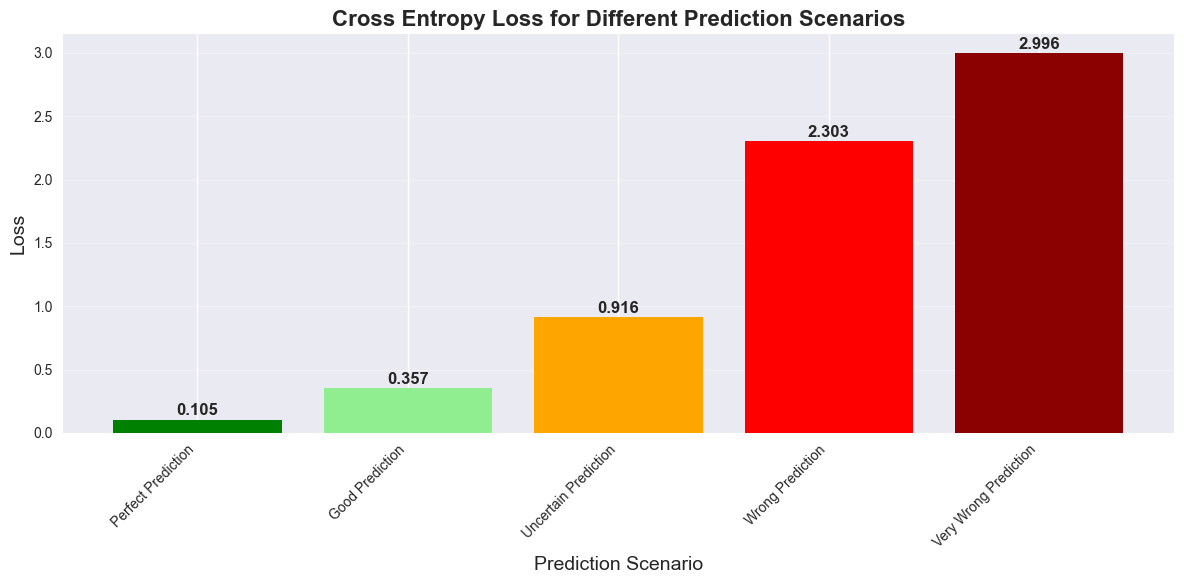


Key observations:
1. Perfect predictions have the lowest loss
2. Loss increases as predictions become less confident
3. Wrong predictions have high loss
4. Very wrong predictions have the highest loss


In [5]:
# Create different prediction scenarios
scenarios = [
    {"name": "Perfect Prediction", "probs": [0.9, 0.05, 0.05]},
    {"name": "Good Prediction", "probs": [0.7, 0.2, 0.1]},
    {"name": "Uncertain Prediction", "probs": [0.4, 0.3, 0.3]},
    {"name": "Wrong Prediction", "probs": [0.1, 0.8, 0.1]},
    {"name": "Very Wrong Prediction", "probs": [0.05, 0.05, 0.9]}
]

# True label is class 0 (one-hot encoded)
y_true_class0 = np.array([1, 0, 0])

print("Cross Entropy Loss for different prediction scenarios (True label = Class 0):")
print("=" * 80)
print(f"{'Scenario':<20} {'Prediction':<25} {'Loss':<10} {'Correct?':<10}")
print("-" * 80)

losses = []
scenario_names = []

for scenario in scenarios:
    y_pred = np.array(scenario["probs"])
    loss = -np.sum(y_true_class0 * np.log(np.clip(y_pred, 1e-15, 1-1e-15)))
    losses.append(loss)
    scenario_names.append(scenario["name"])
    
    pred_class = np.argmax(y_pred)
    is_correct = "Yes" if pred_class == 0 else "No"
    
    print(f"{scenario['name']:<20} {str(y_pred):<25} {loss:<10.4f} {is_correct:<10}")

# Create bar plot
plt.figure(figsize=(12, 6))

bars = plt.bar(scenario_names, losses, color=['green', 'lightgreen', 'orange', 'red', 'darkred'])
plt.title('Cross Entropy Loss for Different Prediction Scenarios', fontsize=16, fontweight='bold')
plt.xlabel('Prediction Scenario', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, loss in zip(bars, losses):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{loss:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey observations:")
print("1. Perfect predictions have the lowest loss")
print("2. Loss increases as predictions become less confident")
print("3. Wrong predictions have high loss")
print("4. Very wrong predictions have the highest loss")

## 3. Sum of Squared Residuals (Mean Squared Error)

Sum of Squared Residuals is used for regression problems where we predict continuous values.

### Mathematical Definition

For a single sample:

$$L(y, \hat{y}) = (y - \hat{y})^2$$

For a batch of samples:

$$L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$

Where:
- $y$ is the true value
- $\hat{y}$ is the predicted value
- $N$ is the number of samples

### Intuition

The loss penalizes the squared difference between predicted and true values. Squaring ensures:
- All errors are positive
- Larger errors are penalized more heavily
- The function is differentiable everywhere

In [6]:
def mean_squared_error_loss(y_true, y_pred):
    """
    Compute mean squared error loss
    
    Parameters:
    y_true: true values
    y_pred: predicted values
    """
    return np.mean((y_true - y_pred) ** 2)

def sum_squared_residuals(y_true, y_pred):
    """
    Compute sum of squared residuals (without averaging)
    """
    return np.sum((y_true - y_pred) ** 2)

# Example: Single sample
y_true_single = 5.0
y_pred_single = 4.2

mse_single = mean_squared_error_loss(np.array([y_true_single]), np.array([y_pred_single]))
ssr_single = sum_squared_residuals(np.array([y_true_single]), np.array([y_pred_single]))

print(f"Single sample example:")
print(f"True value: {y_true_single}")
print(f"Predicted value: {y_pred_single}")
print(f"Residual: {y_true_single - y_pred_single:.2f}")
print(f"Squared residual: {(y_true_single - y_pred_single)**2:.2f}")
print(f"Mean Squared Error: {mse_single:.2f}")
print(f"Sum of Squared Residuals: {ssr_single:.2f}")
print()

# Example: Multiple samples
y_true_batch = np.array([2.5, 3.1, 4.0, 1.8, 5.2])
y_pred_batch = np.array([2.3, 3.3, 3.8, 2.0, 4.9])

mse_batch = mean_squared_error_loss(y_true_batch, y_pred_batch)
ssr_batch = sum_squared_residuals(y_true_batch, y_pred_batch)

print(f"Batch example:")
print(f"True values: {y_true_batch}")
print(f"Predicted values: {y_pred_batch}")
print(f"Residuals: {y_true_batch - y_pred_batch}")
print(f"Squared residuals: {(y_true_batch - y_pred_batch)**2}")
print(f"Mean Squared Error: {mse_batch:.4f}")
print(f"Sum of Squared Residuals: {ssr_batch:.4f}")
print()

# Compare with sklearn implementation
sklearn_mse = mean_squared_error(y_true_batch, y_pred_batch)
print(f"Sklearn MSE: {sklearn_mse:.4f}")
print(f"Our implementation matches sklearn: {np.isclose(mse_batch, sklearn_mse)}")

# Show individual residuals
print("\nIndividual residuals and their squares:")
residuals = y_true_batch - y_pred_batch
squared_residuals = residuals ** 2

for i in range(len(y_true_batch)):
    print(f"Sample {i+1}: True={y_true_batch[i]:.1f}, Pred={y_pred_batch[i]:.1f}, "
          f"Residual={residuals[i]:.2f}, Squared={squared_residuals[i]:.4f}")

Single sample example:
True value: 5.0
Predicted value: 4.2
Residual: 0.80
Squared residual: 0.64
Mean Squared Error: 0.64
Sum of Squared Residuals: 0.64

Batch example:
True values: [2.5 3.1 4.  1.8 5.2]
Predicted values: [2.3 3.3 3.8 2.  4.9]
Residuals: [ 0.2 -0.2  0.2 -0.2  0.3]
Squared residuals: [0.04 0.04 0.04 0.04 0.09]
Mean Squared Error: 0.0500
Sum of Squared Residuals: 0.2500

Sklearn MSE: 0.0500
Our implementation matches sklearn: True

Individual residuals and their squares:
Sample 1: True=2.5, Pred=2.3, Residual=0.20, Squared=0.0400
Sample 2: True=3.1, Pred=3.3, Residual=-0.20, Squared=0.0400
Sample 3: True=4.0, Pred=3.8, Residual=0.20, Squared=0.0400
Sample 4: True=1.8, Pred=2.0, Residual=-0.20, Squared=0.0400
Sample 5: True=5.2, Pred=4.9, Residual=0.30, Squared=0.0900


### Visualizing Mean Squared Error

Let's visualize how MSE changes for different prediction errors.

In [7]:
# Generate different prediction errors
true_value = 5.0
prediction_errors = np.linspace(-3, 3, 100)
predictions = true_value + prediction_errors

# Calculate MSE for each prediction
mse_values = (true_value - predictions) ** 2

# Create the plot
plt.figure(figsize=(12, 8))

plt.plot(predictions, mse_values, 'purple', linewidth=2, alpha=0.8)
plt.axvline(x=true_value, color='red', linestyle='--', alpha=0.7, label=f'True Value ({true_value})')

plt.title('Mean Squared Error vs Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Squared Error', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Add annotations
plt.annotate('Perfect prediction
(MSE = 0)', xy=(true_value, 0), xytext=(true_value + 1, 2),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()

print("Key observations:")
print("1. MSE is minimized when prediction equals true value")
print("2. MSE increases quadratically with prediction error")
print("3. Larger errors are penalized more heavily due to squaring")
print("4. The function is symmetric around the true value")

SyntaxError: EOL while scanning string literal (3374687846.py, line 22)

### Properties of Mean Squared Error

**Advantages:**
- **Differentiable everywhere**: Smooth function that's easy to optimize
- **Penalizes large errors heavily**: Squaring amplifies the impact of large errors
- **Well-understood**: Standard metric in statistics and machine learning
- **Convex function**: Guarantees convergence to global minimum

**Disadvantages:**
- **Sensitive to outliers**: Large errors dominate the loss
- **Units are squared**: Harder to interpret than absolute error
- **Not robust**: Can be heavily influenced by a few bad predictions
- **May not reflect business objectives**: Doesn't account for asymmetric costs

## Comparison of Loss Functions

Let's compare the three loss functions we've discussed.

In [8]:
# Create comparison table
comparison_data = {
    'Loss Function': ['Binary Cross Entropy', 'Cross Entropy (Multi-class)', 'Mean Squared Error'],
    'Problem Type': ['Binary Classification', 'Multi-class Classification', 'Regression'],
    'Output Type': ['Probability (0-1)', 'Probability Distribution', 'Continuous Value'],
    'Range': ['[0, ∞)', '[0, ∞)', '[0, ∞)'],
    'Best When': ['Perfect predictions', 'Perfect predictions', 'Perfect predictions'],
    'Worst When': ['Very wrong predictions', 'Very wrong predictions', 'Large errors'],
    'Common Use': ['Sigmoid + BCE', 'Softmax + CE', 'Linear regression']
}

df_comparison = pd.DataFrame(comparison_data)
print("Loss Functions Comparison:")
print("=" * 100)
print(df_comparison.to_string(index=False))
print("=" * 100)

Loss Functions Comparison:
              Loss Function               Problem Type              Output Type  Range           Best When             Worst When        Common Use
       Binary Cross Entropy      Binary Classification        Probability (0-1) [0, ∞) Perfect predictions Very wrong predictions     Sigmoid + BCE
Cross Entropy (Multi-class) Multi-class Classification Probability Distribution [0, ∞) Perfect predictions Very wrong predictions      Softmax + CE
         Mean Squared Error                 Regression         Continuous Value [0, ∞) Perfect predictions           Large errors Linear regression


## Practical Example: Training a Simple Model

Let's create a simple example to demonstrate how these loss functions work in practice.

Training Binary Classification Model:
Epoch 0: Loss = 0.6989
Epoch 20: Loss = 0.6989
Epoch 40: Loss = 0.6989
Epoch 60: Loss = 0.6989
Epoch 80: Loss = 0.6989

Training Regression Model:
Epoch 0: Loss = 5.9637
Epoch 20: Loss = 5.9637
Epoch 40: Loss = 5.9637
Epoch 60: Loss = 5.9637
Epoch 80: Loss = 5.9637


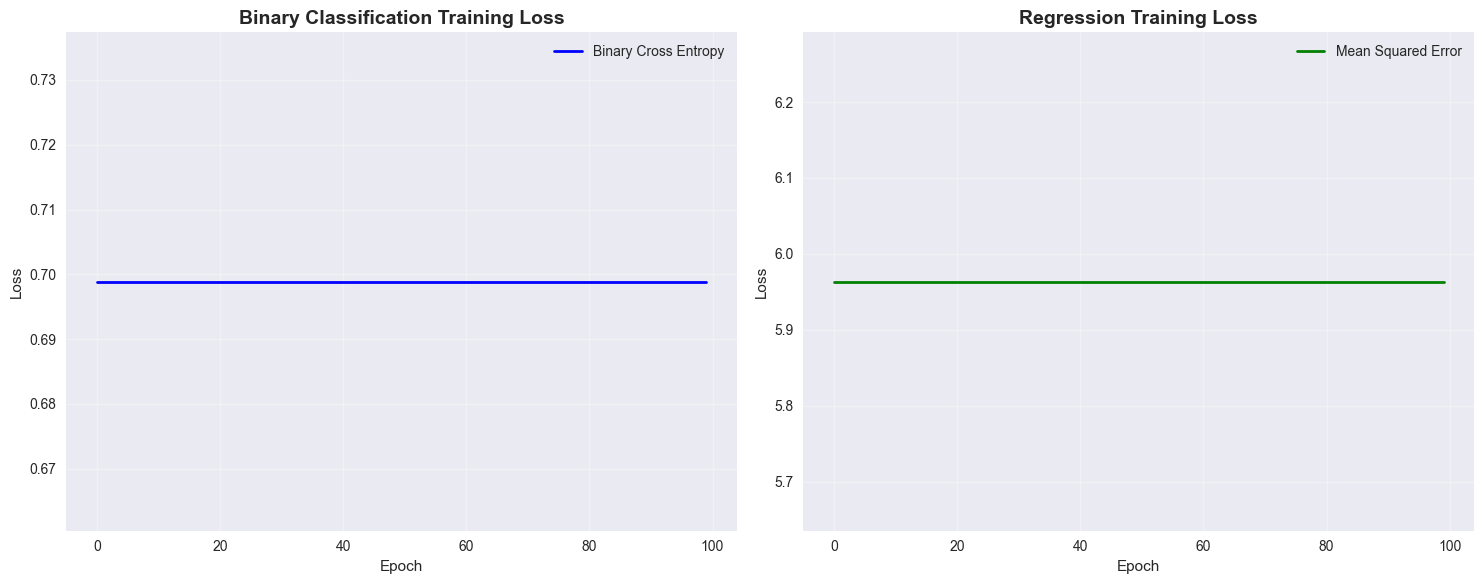


Final Results:
Binary Classification - Final Loss: 0.6989
Regression - Final Loss: 5.9637


In [9]:
# Simple linear model for demonstration
class SimpleModel:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.bias = np.zeros((1, output_size))
    
    def forward(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def predict_proba(self, X):
        # For classification, apply sigmoid
        logits = self.forward(X)
        return 1 / (1 + np.exp(-logits))

# Generate synthetic data
np.random.seed(42)
X_binary = np.random.randn(100, 2)
y_binary = (X_binary[:, 0] + X_binary[:, 1] > 0).astype(int)

X_regression = np.random.randn(100, 1)
y_regression = 2 * X_regression[:, 0] + 1 + np.random.normal(0, 0.1, 100)

# Train binary classification model
model_binary = SimpleModel(2, 1)
learning_rate = 0.01
epochs = 100

binary_losses = []
regression_losses = []

print("Training Binary Classification Model:")
for epoch in range(epochs):
    # Forward pass
    y_pred_proba = model_binary.predict_proba(X_binary)
    
    # Calculate loss
    loss = binary_cross_entropy(y_binary, y_pred_proba.flatten())
    binary_losses.append(loss)
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Train regression model
model_regression = SimpleModel(1, 1)

print("\nTraining Regression Model:")
for epoch in range(epochs):
    # Forward pass
    y_pred = model_regression.forward(X_regression)
    
    # Calculate loss
    loss = mean_squared_error_loss(y_regression, y_pred.flatten())
    regression_losses.append(loss)
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(binary_losses, 'b-', linewidth=2, label='Binary Cross Entropy')
ax1.set_title('Binary Classification Training Loss', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True, alpha=0.3)
ax1.legend()

ax2.plot(regression_losses, 'g-', linewidth=2, label='Mean Squared Error')
ax2.set_title('Regression Training Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("\nFinal Results:")
print(f"Binary Classification - Final Loss: {binary_losses[-1]:.4f}")
print(f"Regression - Final Loss: {regression_losses[-1]:.4f}")

## Conclusion

In this notebook, we've explored three fundamental loss functions in machine learning:

### 1. Binary Cross Entropy Loss
- **Use case**: Binary classification problems
- **Key feature**: Works with probability outputs (0-1)
- **Mathematical form**: $-[y \log(\hat{y}) + (1-y) \log(1-\hat{y})]$
- **Best when**: Predictions are confident and correct

### 2. Cross Entropy Loss (Multi-class)
- **Use case**: Multi-class classification problems
- **Key feature**: Works with probability distributions
- **Mathematical form**: $-\sum_{c=1}^{C} y_c \log(\hat{y}_c)$
- **Best when**: Predicted probabilities match true labels perfectly

### 3. Mean Squared Error (Sum of Squared Residuals)
- **Use case**: Regression problems
- **Key feature**: Works with continuous outputs
- **Mathematical form**: $\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$
- **Best when**: Predictions are close to true values

### Key Takeaways:

1. **Choose the right loss function for your problem**:
   - Classification → Cross Entropy
   - Regression → Mean Squared Error

2. **Loss functions guide learning**: They provide the optimization objective that the model tries to minimize

3. **Understanding the mathematical form helps**: Knowing how the loss behaves helps in debugging and improving models

4. **Loss functions have different properties**: Some are more robust to outliers, some are more sensitive to certain types of errors

### Next Steps:

To deepen your understanding, consider exploring:
- **Huber Loss**: Combines benefits of MSE and MAE
- **Focal Loss**: Addresses class imbalance in classification
- **Custom Loss Functions**: Designing loss functions for specific business objectives
- **Loss Function Selection**: How to choose the right loss function for your specific problem

Understanding loss functions is crucial for building effective machine learning models and interpreting their behavior.